<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Привет, Эльдар!</b>

Меня зовут Алексей Косенко, и я буду проверять твой проект. Прошу прощения за долгое ожидание
    
Предлагаю общаться на «<b>ты</b>», но если это неудобно — обязательно сообщи об этом.
    
Ниже ты увидишь мои комментарии, выделенные разным цветом:
    
<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Отлично!</b> ✔️: все ок, продолжай в том же духе :)

</div>
<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
<b>Есть совет</b> ⚠️: так выделены некритичные замечания или советы, которые смогут улучшить твой проект.

</div>
<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Нужно доработать</b> ❌: так выделены важные замечания — без их исправления проект не может быть принят.
    
</div>

Будет здорово, ес
    ли ты будешь участвовать в диалоге, а свои вопросы, комментарии и изменения в проекте тоже будешь выделять, например, вот так:
    
<div class="alert alert-info">
    <b>Комментарий студента:</b> твой комментарий
</div>
    
Пожалуйста, не перемещай и не удаляй мои комментарии, это усложнит повторную проверку.
    
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Еще раз привет!</b>

Спасибо, что доделал работу, оформление комментариев остается тем же, только обозначим номер итерации: v2
    
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>И снова здравствуй!</b>

Все правила оформления те же, обозначим номер итерации: v3
    
</div>

# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

### Шаг 1. Откройте файлы с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
import seaborn as sb
from sklearn.metrics import recall_score

In [2]:
train_data = pd.read_csv('/datasets/hotel_train.csv')
test_data = pd.read_csv('/datasets/hotel_test.csv')

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: данные на месте!</div>

### Шаг 2. Предобработка и исследовательский анализ данных

In [3]:
print(train_data.info())
print()
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [4]:
display(train_data.head(5))
test_data.head(5)

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7


In [5]:
train_data.duplicated().value_counts()

False    65229
dtype: int64

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: стоит еще проверить наличие дубликатов после удаления id</div>

Пропусков в данных не обнаружил, дубликатов тоже нет

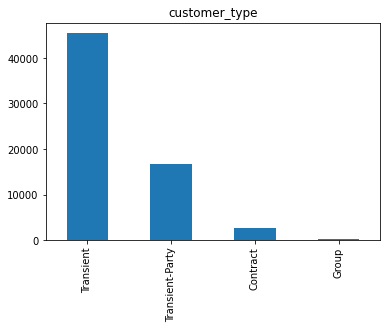

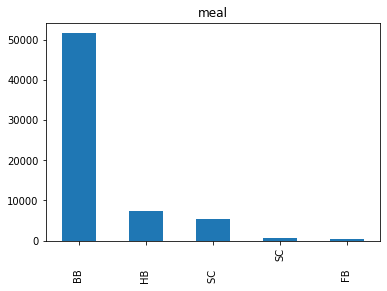

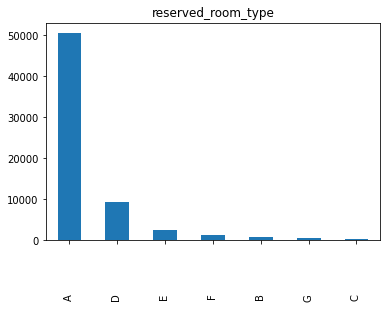

In [6]:
columns = ['customer_type', 'meal', 'reserved_room_type']

for column in columns:
    train_data[column].value_counts().plot(kind='bar', title=column)
    plt.show()

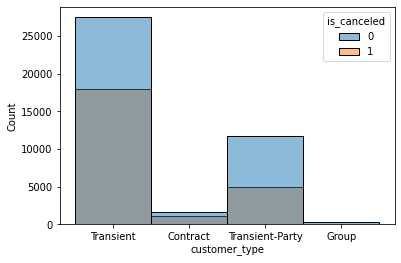

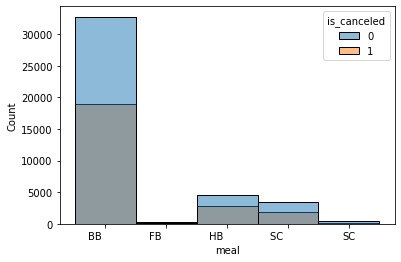

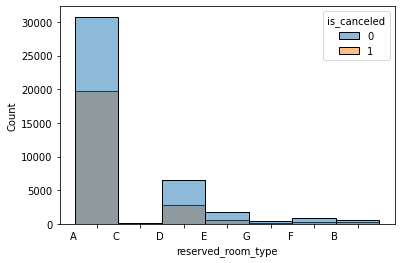

In [7]:
for column in columns:
    sb.histplot(data=train_data, x=column, hue='is_canceled')
    plt.show()

Выявились наиболее популярные категории клиентов по столбцам:
- Customer_type: `Transient` (не связано с договором или групповым заездом)
- Meal: `BB` (включён завтрак)
- Reserved_room_type: `A` 

<AxesSubplot:title={'center':'country'}>

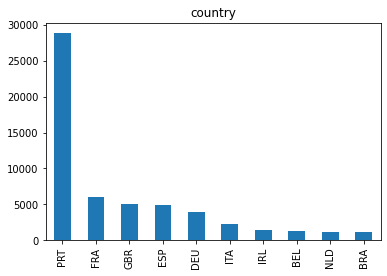

In [8]:
train_data['country'].value_counts().iloc[:10].plot(kind='bar', title='country')

В столбце со странами приобладает Португалия. Посмотрим как этот график изменится для выборок отмененных и не отмененных броней

<AxesSubplot:title={'center':'country'}>

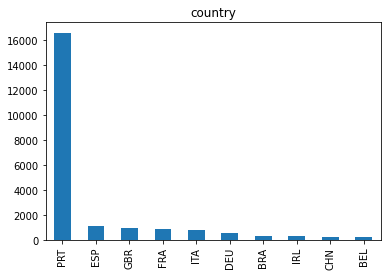

In [9]:
train_data.loc[train_data['is_canceled']==1, 'country'].value_counts().iloc[:10].plot(kind='bar', title='country')

<AxesSubplot:title={'center':'country'}>

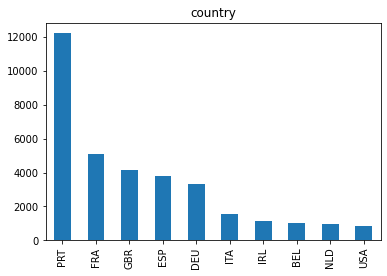

In [10]:
train_data.loc[train_data['is_canceled']==0, 'country'].value_counts().iloc[:10].plot(kind='bar', title='country')

Сразу стало видно что португальцы чаще отменяют бронь, соотношение с другими значниями в выборке отмененных броней сильно больше. 

In [11]:
# train_data = train_data.drop('country', axis=1) 
# test_data = test_data.drop('country', axis=1)

<div class="alert alert-info">
    <b>Комментарий студента:</b> НЕ удалил столбцы со значеними стран, полезной информации для наших целей они не несут
</div>


<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: не очень понятно, как ты пришел к выводу, что страны не несут полезной информации, такое утверждение нужно аргументировать с помощью исследования. Например, можно посчитать долю отмененных бронирований для каждой страны. Если доля заметно отличается для самых популярных стран, то признак удалять уже не совсем корректно</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: окей, но так как в датасете представлено больше 150 стран, то все из них нам не понадобятся(с учетом того, что в большинстве из них небольшое количество бронирований), поэтому можно оставить, например, топ-30 стран, а остальным присвоить категорию `Other`.  Либо, можно попробовать разделить страны по частям света. Чтобы не делать это вручную, можно использовать общедоступный датасет, например, этот:
    
    countries = pd.read_csv('https://www.artlebedev.ru/country-list/tab/', sep='\t')
</div>

In [12]:
def replace(val):
    return val.replace(' ', '')

In [13]:
train_data['reserved_room_type'] = train_data['reserved_room_type'].apply(replace)
test_data['reserved_room_type'] = test_data['reserved_room_type'].apply(replace)

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: молодец, что заметил неявные дубликаты!</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: но стоит проверить и другие категориальные признаки на предмет лишних пробелов</div>

In [14]:
train_data['reserved_room_type'].value_counts()

A    50501
D     9387
E     2448
F     1213
B      860
G      592
C      228
Name: reserved_room_type, dtype: int64

Исправил формат значений столбца, убрал лишние пробелы

In [15]:
train_data['arrival_date_month'].value_counts()

October      9255
September    8782
August       6678
November     5761
July         5718
December     5497
April        4804
May          4677
June         4659
March        4148
February     3358
January      1892
Name: arrival_date_month, dtype: int64

In [16]:
def night_cost_with_season_coef(row):
    if row['arrival_date_month'] in ['July', 'June', 'August']:
        return row['night_cost'] * 1.4
    if row['arrival_date_month'] in ['May', 'March', 'April', 'September', 'October', 'November']:
        return row['night_cost'] * 1.2
    return row['night_cost']

In [17]:
datas = [train_data, test_data]

for data in datas:
    data.loc[data['reserved_room_type'] == 'A', 'night_cost'] = 1000
    data.loc[data['reserved_room_type'] == 'B', 'night_cost'] = 800
    data.loc[data['reserved_room_type'] == 'C', 'night_cost'] = 600
    data.loc[data['reserved_room_type'] == 'D', 'night_cost'] = 550
    data.loc[data['reserved_room_type'] == 'E', 'night_cost'] = 500
    data.loc[data['reserved_room_type'] == 'F', 'night_cost'] = 450
    data.loc[data['reserved_room_type'] == 'G', 'night_cost'] = 350
    
    for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
        if i == 'A':
            cost = 400
        if i in ['B', 'C']:
            cost = 350
        if i in ['D', 'E', 'F', 'G']:
            cost = 150
        data.loc[data['reserved_room_type'] == i, 'one_time_service'] = cost
        
    
    data['night_cost'] = data.apply(night_cost_with_season_coef, axis=1)


    data['sum_cost_for_night'] = data['night_cost'] + data['one_time_service']
    data['sum_cost_for_all_nights'] = data['night_cost'] * data['total_nights'] - data['one_time_service'] * (1 + data['total_nights'] // 2)

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: почти все окей, но, согласно заданию, цены на 20% повышаются не только весной, но и осенью, нужно поправить</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Сделано
</div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: давай попробуем разобрать этот фрагмент кода:

    for i in ['July', 'June', 'August', 'May', 'March', 'April']:
        if i in ['July', 'June', 'August']:
            coef = 1.4
        if i in ['May', 'March', 'April', 'September', 'October', 'November']:
            coef = 1.2
    
В условии `if i in ['May', 'March', 'April', 'September', 'October', 'November']` счетчик никогда не будет равен ни одному осеннему месяцу, так как ты итерируешься только по летним и весенним. Также в выражении `data.loc[data['arrival_date_month'] == i, 'night_cost'] *= coef` коэффициент не применится к осеннему месяцу по той же причине, ниже я привел пример, нужно поправить
</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Да, тут поторопился, глупая ошибка, все исправил
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

In [18]:
# код ревьюера

train_data.loc[train_data['arrival_date_month'] == 'September'][['arrival_date_month', 'reserved_room_type', 'night_cost']].head()

,arrival_date_month,reserved_room_type,night_cost
847,September,A,1200.0
848,September,D,660.0
849,September,E,600.0
850,September,E,600.0
851,September,C,720.0


<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: лучше здесь вообще отказаться от циклов, а использовать функцию, которую можно применить в apply, тогда она будет выглядеть примерно так:

    def night_cost_with_season_coef(row):
        if row['arrival_date_month'] in ['July', 'June', 'August']:
            return row['night_cost'] * 1.4
        if row['arrival_date_month'] in ['December', 'January', 'February']:
            return row['night_cost']
        return row['night_cost'] * 1.2

    data['night_cost'] = data.apply(night_cost_with_season_coef, axis=1)
    
Аналогичным образом можно поправить расчет стоимости номера и уборки. Так твой код будет работать оптимальнее и его будет проще читать
</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Я заметил ошибки в предложенной функции. Все исправил и использовал в своем коде
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: честно говоря, не вижу здесь ошибки :) Я просто вместо проверки на весенние/осенние месяцы добавил проверку на зимние месяцы, чтобы указать в списке только 3 месяца, а не 6, так мне код кажется элегантнее, привычка программиста :) А в остальном он идентичен твоей функции</div>

In [19]:
test_data.head(5)

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,night_cost,one_time_service,sum_cost_for_night,sum_cost_for_all_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,Transient,0,0,1,1000.0,400.0,1400.0,600.0
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,Transient,0,1,4,1000.0,400.0,1400.0,2800.0
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,Transient,0,1,4,1000.0,400.0,1400.0,2800.0
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,Transient,0,1,4,1000.0,400.0,1400.0,2800.0
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,Transient,0,0,7,1000.0,400.0,1400.0,5400.0


Добавил столбцы с посчитанными расценками с учетом коэфицентов по времени года. Добавил столбец с сумарной прибылью за период бронирования

In [20]:
counted_columns = ['adults', 'babies', 'children', 'booking_changes', 'days_in_waiting_list', 'lead_time', 'previous_cancellations', 'required_car_parking_spaces', 'total_nights', 'total_of_special_requests']

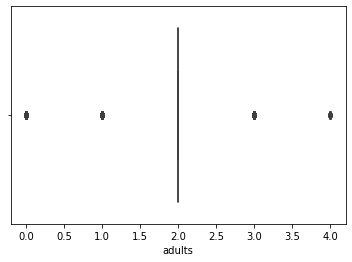

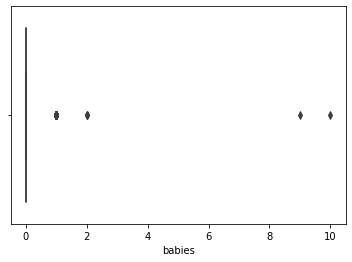

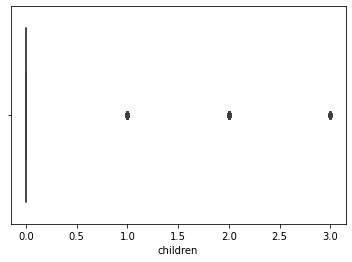

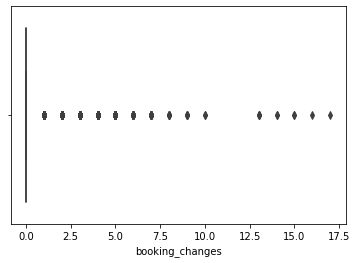

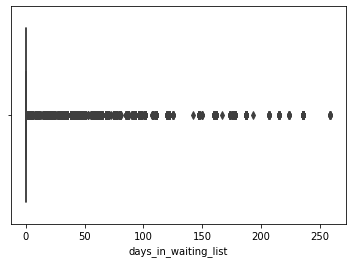

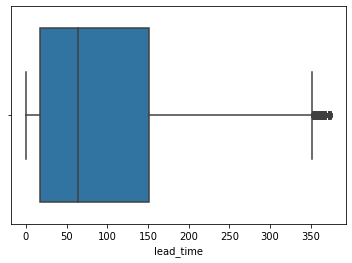

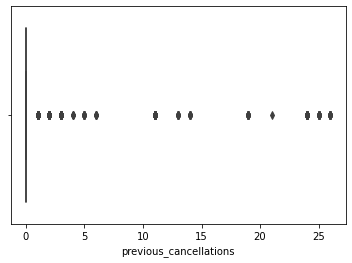

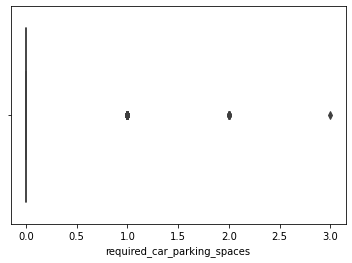

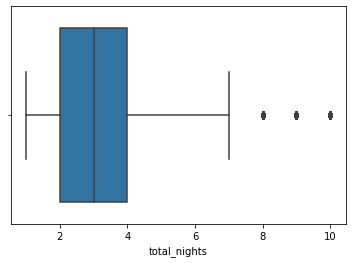

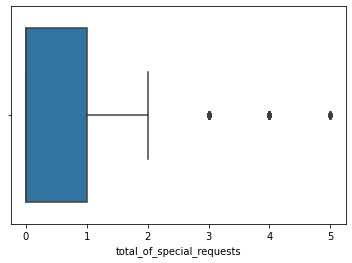

In [21]:
for column in counted_columns:
    sb.boxplot(data=train_data, x=column, hue="is_canceled")
    plt.show()

Выявили наиболее частые значения, так же нашли выбросы, которые стоит поправить 

In [22]:
train_data = train_data.drop(train_data[train_data['babies']>=8].index, axis=0)

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: обязательная часть любого исследовательского анализа — это визуализация и описанные в выводах наблюдения, тут полезно будет поизучать, например, следующее:
1. Доля клиентов по странам, типу заказчика, питанию, категориям номеров и т.д.
2. Соотношение ушедших/неушедших клиентов по всем признакам. Для этого можно использовать <a href="https://seaborn.pydata.org/generated/seaborn.histplot.html" target="blank_">seaborn.histplot</a> и <a href="https://seaborn.pydata.org/generated/seaborn.countplot.html">seaborn.countplot</a>
3. Диаграммы размаха по численным признакам(<a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html" target="blank_">seaborn.boxplot</a>)
4. Матрица корреляций(а тут поможет <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html" target="blank_">seaborn.heatmap</a>)

Нужно построить хотя бы часть из них, это важная часть проекта</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Сделано
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: вот теперь другое дело :)</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: также нужно больше времени уделить предобработке, начать можно со следующего:
1. Лучше внимательнее изучить каждый признак на предмет выбросов: например, 10 младенцев в бронировании или 8 требуемых парковочных мест — явные аномалии, которые стоит обработать;
2. Также можно проверить данные на адекватность: например, детям без взрослых номер сдать не могут, так что если такие записи есть — их лучше удалить
3. Судя по описанию, `total_nights` — это сумма `stays_in_week_nights` и `stays_in_weekend_nights`, если это и правда так, то все три признака нам не нужны, некоторые стоит удалить</div>

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

In [23]:
def profit(df):
    inc = df.loc[df['is_canceled'] == 0, 'sum_cost_for_all_nights'].sum()
    inc -= df.loc[df['is_canceled'] == 1, 'sum_cost_for_night'].sum()
    return inc

Функция подсчета прибыли без учета депозита для известных данных

In [24]:
print('Чистая прибыль тренировочной выборки', profit(train_data))
print('Чистая прибыль тестовой выборки', profit(test_data))

Чистая прибыль тренировочной выборки 66146770.0
Чистая прибыль тестовой выборки 32582920.0


In [25]:
def profit_metric(df, df_dep, budget=0, dep_coef=.8):
    inc = df.loc[(df['is_canceled'] == 0) & (df_dep['is_canceled'] == 0), 'sum_cost_for_all_nights'].sum()
    inc -= df.loc[(df['is_canceled'] == 1) & (df_dep['is_canceled'] == 1), 'sum_cost_for_night'].sum() * (1-dep_coef)
    inc += df.loc[(df['is_canceled'] == 0) & (df_dep['is_canceled'] == 1), 'sum_cost_for_all_nights'].sum()
    inc -= df.loc[(df['is_canceled'] == 1) & (df_dep['is_canceled'] == 0), 'sum_cost_for_night'].sum()
    
    profit_ratio = inc / profit(df) # Считает отношение прибли без депозитов и с депозитами
    profit_difference = inc - profit(df) - budget # Чистая разность прибыли с учетом бюджета на внедрение системы
    return profit_ratio, profit_difference

Написал метрику для анализа прибыльности. Результаты расчетов: `соотношение прибыли для данных без депозитов и с вводом депозитной системы`, второе число: `разница в прибыли с вычетом бюджета на разработку`

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: прибыль после внедрения модели рассчитана верно!</div>

### Шаг 4. Разработка модели ML

In [26]:
train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: для «деревянных» моделей лучше использовать порядковое кодирование, так как они заметно быстрее обучаются на меньшем количестве признаков и не теряют в качестве, есть <a href="https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931" target="blank_">шикарная статья</a>на эту тему. Но для линейных моделей(в том числе логистической регрессии) порядковое кодирование не подходит, потому что задает приоритет признакам, которого в природе данных нет. Тогда, например, значение «2» в признаке `country` для них будет важнее, чем значение «0», а для наших данных это неверное утверждение. Поэтому для них лучше использовать OHE. Тогда у тебя получится разная предобработка для разных моделей, это нормально :)</div>

In [27]:
columns = set(test_data.columns).difference(set(train_data.columns))
columns

{'country_ASM',
 'country_ATF',
 'country_BHS',
 'country_CAF',
 'country_FJI',
 'country_FRO',
 'country_GHA',
 'country_GTM',
 'country_KIR',
 'country_LAO',
 'country_MDG',
 'country_MRT',
 'country_MYT',
 'country_NCL',
 'country_NPL',
 'country_SDN',
 'country_SLE',
 'country_TGO',
 'country_UMI'}

In [28]:
train_data[list(columns)] = 0

In [29]:
columns = set(train_data.columns).difference(set(test_data.columns))
columns

{'arrival_date_month_December',
 'arrival_date_month_November',
 'arrival_date_month_October',
 'arrival_date_month_September',
 'country_ARM',
 'country_BDI',
 'country_BFA',
 'country_BOL',
 'country_BRB',
 'country_BWA',
 'country_CYM',
 'country_DMA',
 'country_GEO',
 'country_GGY',
 'country_GLP',
 'country_GUY',
 'country_HND',
 'country_KHM',
 'country_KNA',
 'country_LCA',
 'country_MKD',
 'country_MLI',
 'country_MMR',
 'country_MWI',
 'country_NAM',
 'country_NIC',
 'country_OMN',
 'country_PLW',
 'country_PYF',
 'country_RWA',
 'country_SMR',
 'country_TMP',
 'country_UGA',
 'country_VGB',
 'country_ZMB'}

In [30]:
test_data[list(columns)] = 0

В тестовых данных меньше столбцов, поэтому для работы обученной модели добавим столбцы в тестовую выборку. Значения в столбцах -  0

In [31]:
print(test_data.shape, train_data.shape)

(32412, 223) (65227, 223)


In [32]:
train_data.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,country_MYT,country_GTM,country_FRO,country_ATF,country_BHS,country_ASM,country_KIR,country_LAO,country_MRT,country_SLE
0,0,0,7.0,2015,27,1,0,1,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,14.0,2015,27,1,0,2,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0.0,2015,27,1,0,2,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,9.0,2015,27,1,0,2,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,85.0,2015,27,1,0,3,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Теперь можно продолжать работу

In [33]:
features_train = train_data.drop(['is_canceled',
                                  'id',
                                  'sum_cost_for_all_nights', 
                                  'sum_cost_for_night', 'night_cost', 
                                  'one_time_service'], axis=1)
features_test = test_data.drop(['is_canceled', 
                                'id',
                                'sum_cost_for_all_nights', 
                                'sum_cost_for_night', 'night_cost', 
                                'one_time_service'], axis=1)

target_train = train_data['is_canceled']
target_test = test_data['is_canceled']

scaler = StandardScaler()
scaler.fit(features_train) 
features_train = scaler.transform(features_train)
scaler.fit(features_test) 
features_test = scaler.transform(features_test)

In [34]:
print(features_train.shape, features_test.shape)

(65227, 217) (32412, 217)


Выделил в выборках целевой признак, а так же параметры

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: окей, хорошо, что не забываешь про масштабирование, это может улучшить качество логистической регрессии</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: правильнее обучать StandardScaler только на обучающей выборке, а трансформировать уже обе. Если распределения признаков в тестовой выборке будет отличаться от распределений в обучающей(а это происходит почти всегда), то метрики на тестовой выборке могут оказаться заниженными, поскольку признаки в двух выборках масштабируются по-разному и модель просто не сможет найти тех значений в тестовой выборке, которые были в обучающей выборке</div>

#### Перейдем к подбору модели

Ключевая метрика в данной задаче - `Recall`. Наиболее важны для нас положительные ответы, т.к. они напрямую влияют на сумму убытков

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: перед обучением модели обязательно нужно выбрать основную метрику для оценки моделей и аргументировать свой выбор, исходя из бизнес-задачи, это очень важная часть проекта</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Сделано
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: окей, принимается :)</div>

In [35]:
rfc = RandomForestClassifier(random_state=123141)

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: не забывай указывать значение random_state при инициализации моделей, чтобы значения были воспроизводимы</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Сделано
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

In [36]:
parameters = {
    "n_estimators":[5,10,50],
    "max_depth":[2,4,8,16,None],
}

In [37]:
cv = GridSearchCV(rfc,parameters, scoring='recall',cv=5)
cv.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123141),
             param_grid={'max_depth': [2, 4, 8, 16, None],
                         'n_estimators': [5, 10, 50]},
             scoring='recall')

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: круто, что используешь GridSearch!</div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: но GridSearchCV по стандарту для выбора лучшей модели использует в качестве метрики ту, которая используется для метода score в самой модели. В случае RandomForestClassifier — это accuracy_score. Нужную метрику можно указать с помощью параметра scoring, подробнее про это можно почитать в <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="blank_">документации</a>. А значение метрики нужно получать с помощью свойства best_score_, так как это результат кросс-валидации(среднее между метриками)</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Сделано
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

In [38]:
def display_cv(results):
    print(f'Best parameters are: {results.best_params_}', f'Best score is: {results.best_score_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    params = results.cv_results_['params']
    for mean, params in zip(mean_score, params):
        print(f'{round(mean,4)} for the {params}')

In [39]:
display_cv(cv)

Best parameters are: {'max_depth': 16, 'n_estimators': 5} Best score is: 0.4664753829221347


0.2183 for the {'max_depth': 2, 'n_estimators': 5}
0.0534 for the {'max_depth': 2, 'n_estimators': 10}
0.0043 for the {'max_depth': 2, 'n_estimators': 50}
0.3947 for the {'max_depth': 4, 'n_estimators': 5}
0.2977 for the {'max_depth': 4, 'n_estimators': 10}
0.1224 for the {'max_depth': 4, 'n_estimators': 50}
0.4402 for the {'max_depth': 8, 'n_estimators': 5}
0.4439 for the {'max_depth': 8, 'n_estimators': 10}
0.429 for the {'max_depth': 8, 'n_estimators': 50}
0.4665 for the {'max_depth': 16, 'n_estimators': 5}
0.4578 for the {'max_depth': 16, 'n_estimators': 10}
0.4463 for the {'max_depth': 16, 'n_estimators': 50}
0.4191 for the {'max_depth': None, 'n_estimators': 5}
0.3705 for the {'max_depth': None, 'n_estimators': 10}
0.3957 for the {'max_depth': None, 'n_estimators': 50}


Модель показала не лучший результат. Поищем более перспективную

In [40]:
# features_train, features_valid, target_train, target_valid = train_test_split(
#     features_train, target_train, test_size=.25, random_state=134)

Делю тестовую выборку именно здесь, потому что в одном из прошлых проектов мне написали, что урезать тренировочную выборку на `GridSearchCV` будет лишним

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: в этом проекте не нужно разбивать выборки на подвыборки: обучающая и тестовая выборки у тебя уже есть, а валидационная выборка нам не нужна, потому что метрики нужно рассчитывать на кросс-валидации</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Сделано
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

In [41]:
for depth in [2,4,8,16,32,64,128]:
    dt = DecisionTreeClassifier(max_depth = depth, random_state=23321)
    dt.fit(features_train, target_train)
    predicted_tree = dt.predict(features_train)
    print(
        cross_val_score(dt, features_train, target_train, scoring='recall', cv=5).mean(),
        cross_val_score(dt, features_train, target_train, scoring='f1', cv=5).mean(),
        depth)

0.306403602646037 0.34255930266401274 2
0.527321830358981 0.577747026233469 4
0.49001334332569024 0.4818851871293287 8
0.438565532804029 0.4217699894668544 16
0.42017909431463263 0.39693476528536575 32
0.4398935596007071 0.41705183588927486 64
0.4398935596007071 0.41705183588927486 128


<div class="alert alert-danger">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: если ты хочешь рассчитать дополнительные метрики, то для этого также нужно использовать кросс-валидацию, а не обучающую выборку</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Исправил
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

Эта модель уже сильно лучше, особенно радует значение `f1` метрики. Сохраним ее

In [42]:
dt = DecisionTreeClassifier(max_depth=4, random_state=23321)
dt.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=4, random_state=23321)

Теперь к логистической регрессии

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: выше ты уже масштабируешь данные, повторно это делать не нужно</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

In [43]:
lrcv = LogisticRegression(solver='liblinear', random_state=14151)
lrcv.fit(features_train, target_train)
predicted_log = lrcv.predict(features_train)
print(
    cross_val_score(lrcv, features_train, target_train, scoring='recall', cv=5).mean(),
    cross_val_score(lrcv, features_train, target_train, scoring='f1', cv=5).mean())

0.4744140389155248 0.48034615852703844


Лучше, чем первая, но `recall` не так хороша как у `Случайного дерева`

- Проверим метрики на тестовой выборке

In [44]:
dt = DecisionTreeClassifier(max_depth=64, random_state=23321)
dt.fit(features_train, target_train)
predicted = dt.predict(features_test)
print(recall_score(target_test, predicted),
     f1_score(target_test, predicted))

0.4523866253673259 0.49655653386801496


<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: при проверке лучшей модели на тестовой выборке кросс-валидация нам уже не пригодится, тут достаточно просто посчитать метрику на предсказаниях модели на тестовой выборке, как ты это делаешь для F1</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Сделано
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

In [45]:
predicted_data = test_data.copy()
predicted_data['is_canceled'] = predicted

In [46]:
print(profit_metric(test_data, predicted_data, 400_000))

(1.2036421536191355, 6235256.0)


Общие метрики на тестовой выборке очевидно ниже, однако целевая метрика показала хорошие результаты. 

Прибыль окзалась на `20%` больше прежней. При этом чистое увеличение прибыли с учетом затрат на разработку и внедрение: почти  `6 млн.р.`

### Шаг 5. Опишите портрет «ненадёжного» клиента

In [47]:
columns = train_data.drop(['is_canceled',
                           'id',
                           'sum_cost_for_all_nights', 
                           'sum_cost_for_night', 
                           'night_cost', 
                           'one_time_service'], axis=1).columns

In [48]:
client = pd.Series(dt.feature_importances_, index=columns).sort_values(ascending=False)

<div class="alert alert-danger">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: из-за опечатки тут код падает с ошибкой, перед следующей отправкой убедись, что проект полностью запускается в окружении Практикума</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Сделано
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: теперь все гуд :)</div>

Создал датасет с данными о весах критериев

In [49]:
client.describe()

count    217.000000
mean       0.004608
std        0.020838
min        0.000000
25%        0.000000
50%        0.000102
75%        0.001276
max        0.237565
dtype: float64

Определил значения, относительно которых можно определить самые явные критерии

<AxesSubplot:>

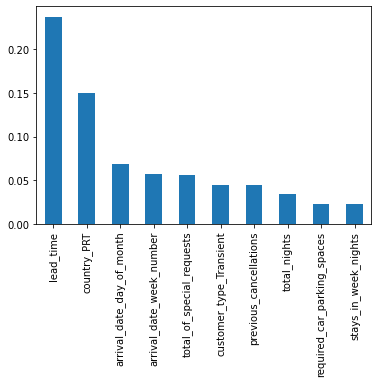

In [50]:
client.iloc[:10].plot(kind='bar')

Построил график с `топ 10` критериев. Самым важной в классификации оказалось время между датой бронирования и датой заезда

In [51]:
canceled_data = train_data[train_data['is_canceled'] == 1]
canceled_data_main_features = canceled_data[client.iloc[:15].index]

canceled_data_main_features.head()

,lead_time,country_PRT,arrival_date_day_of_month,arrival_date_week_number,total_of_special_requests,customer_type_Transient,previous_cancellations,total_nights,required_car_parking_spaces,stays_in_week_nights,arrival_date_year,booking_changes,stays_in_weekend_nights,adults,meal_SC
4,85.0,1,1,27,1,1,0,3,0,3,2015,0,0,2.0,0
5,75.0,1,1,27,0,1,0,3,0,3,2015,0,0,2.0,0
6,23.0,1,1,27,0,1,0,4,0,4,2015,0,0,2.0,0
18,40.0,1,2,27,1,1,0,4,0,3,2015,0,1,3.0,0
22,45.0,1,2,27,0,1,0,5,0,3,2015,0,2,2.0,0


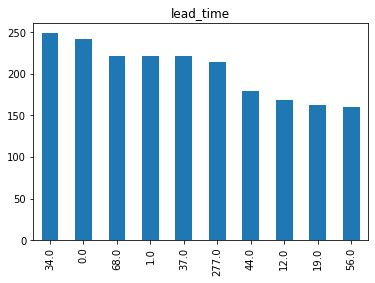

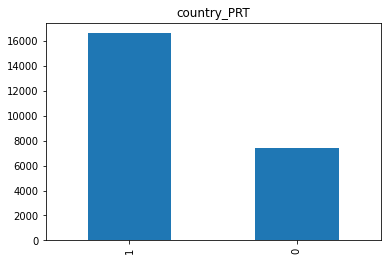

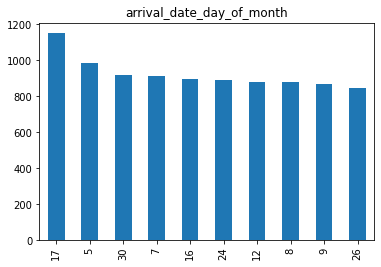

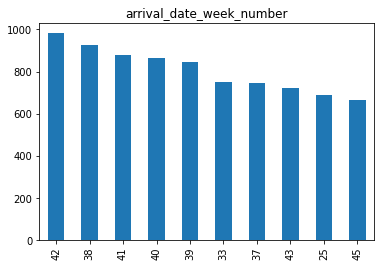

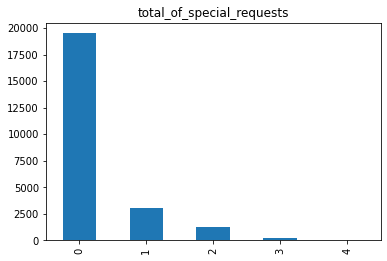

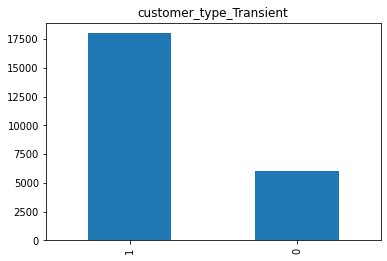

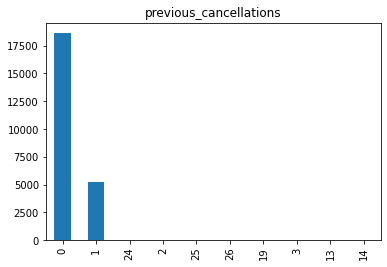

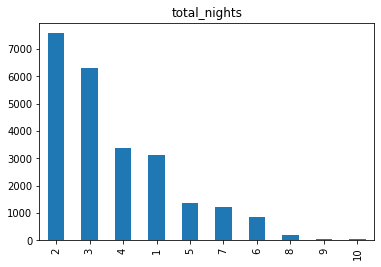

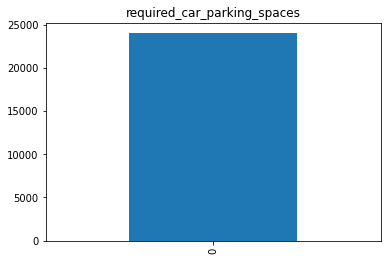

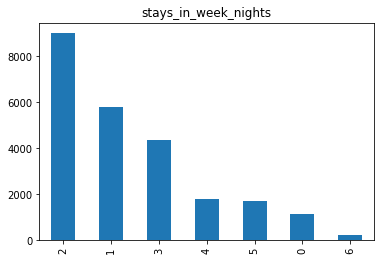

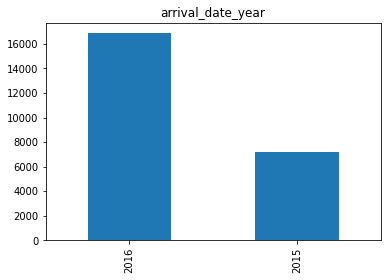

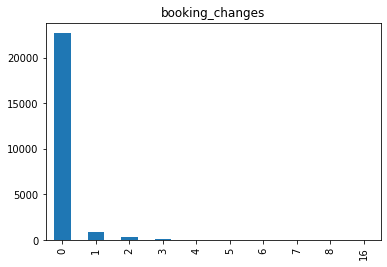

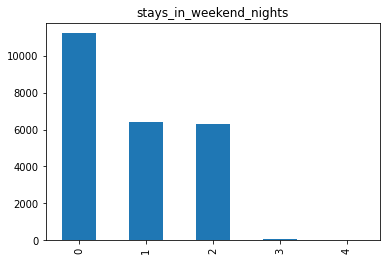

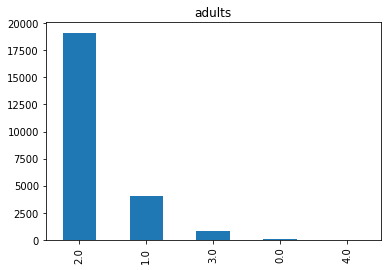

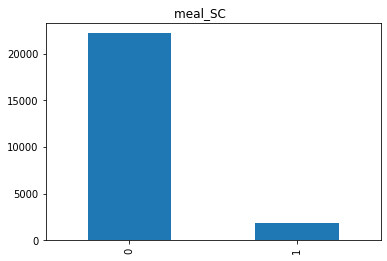

In [52]:
for column in canceled_data_main_features.columns:
    
    canceled_data_main_features[column].value_counts().sort_values(ascending=False).iloc[:10].plot(kind='bar', title=column)

    plt.show()

Наиболее явными признаками из выбранных оказались: Количество прошлых отмен, Тип клиента, Количество дней, Количество изменений параметров, Количество взрослых посетителей, Количество парковочных мест.

Так же видна связь с данными дней месяца, и недель. Вероятнее всего дни месяца вошли в выборку по причине брони в праздники.

Дальше я приведу несколько более конкретных исследований критериев которые меня заинтересовали

<AxesSubplot:ylabel='Frequency'>

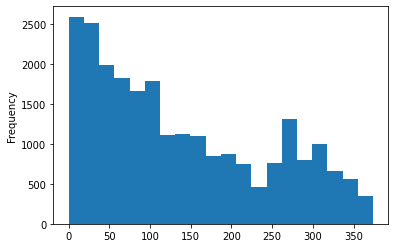

In [53]:
canceled_data_main_features['lead_time'].plot(kind='hist', bins=20)

Чем меньше время между датой брони и датой заезда, тем больше вероятность того, что клиент отменит бронь

<AxesSubplot:ylabel='Frequency'>

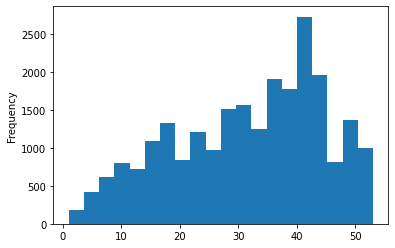

In [54]:
canceled_data_main_features['arrival_date_week_number'].plot(kind='hist', bins=20)

Наиболее частыми значниями недели датасете: 40-45. Эти значения соответствуют концу лета и началу осени, если переводить в месяц

<AxesSubplot:ylabel='Frequency'>

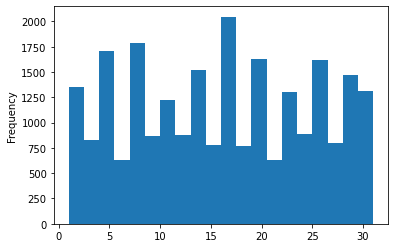

In [55]:
canceled_data_main_features['arrival_date_day_of_month'].plot(kind='hist', bins=20)

Так же посмотрим на распределение дней. Как можно увидеть, разброс достаточно хаотичный, с уверенностью сказать по какому признаку модель дала большие веса этому критерию нельзя

#### Итог

`Портрет ненадежного клиента`

- Между бронью и заездом мало времени
- Вероятно уже были отмены брони
- Заказывает бронь в 40-45 недели
- Мало специальных отметок
- Заезд не связан с договором или групповымзаездом
- Бронирует на 1-5 ночей
- Нет изменений в параметрах бронирования
- Не требует парковочного места
- Вероятнее всего около 2-х гостей


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: классный получился портрет!</div>

### Шаг 6. Напишите общий вывод

На основе данных датасетов разработал модель ML, повышающую прибыль на `20%`. Чистую прибыль при этом, с учетом бюджета на внедрение, удалось поднять более чем на `7 млн.р.`

Наилучшие результаты показала модель `DecisionTreeClassifier`, ее и использовал для последующего посчета. После проведенных исследований удалось составить список типов критериев "ненадежного" клиента. 

Итог: введение системы депозитирования на основе ML модели существенно повышает прибыль

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера<a class="tocSkip"></a></h2>

Видно, что ты приложил много усилий, спасибо за проект!

Но тебе обязательно нужно обратить внимание на следующее:
* доработай исследовательский анализ;
* поправь расчет прибыли, а именно применение сезонного коэффициента;
* выбери и аргументируй свой выбор метрики: вообще подходящих метрик тут может быть несколько, но по сути основная задача с точки зрения ML — это минимизировать количество ложноотрицательных ответов: то есть тех клиентов, которых модель посчитает неотменяющими, но они все равно не приедут. Но если разобраться, то и бизнес-метрика вполне может быть основной метрикой для оценки моделей, здорово, если у тебя получится это реализовать;
* укажи выбранную тобой метрику при вызове GridSearchCV и cross_val_score;
* считать метрики и выбирать модели нужно на основании метрик на кросс-валидации, выделять валидационную выборку не нужно

Остальные комментарии можно найти в проекте. Готов ответить на любые вопросы :)

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v2<a class="tocSkip"></a></h2>

Уже намного лучше, молодец!

Но еще осталось поправить следующее:
* перепроверь формулу для расчета прибыли;
* при расчете дополнительных метрик на этапе обучения также нужно использовать кросс-валидацию, а не обучающую выборку;
* убедись, что проект запускается без ошибок в окружении Практикума, без этого я не смогу его принять

Не стесняйся задавать вопросы, если что-то непонятно

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v3<a class="tocSkip"></a></h2>

Вот теперь другое дело :)

Все критичные замечания исправлены, и я могу принять твою работу

<b>Успехов в обучении!</b>
        
</div>